In [44]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
with open('D:/Data/python.txt') as file:
    data = file.read()
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print('data has %d characters, %d unique' % (data_size, vocab_size))
char_to_ix = {ch:i for i, ch in enumerate(chars)}
ix_to_char = {i:ch for i, ch in enumerate(chars)}

data has 7277693 characters, 113 unique


In [46]:
hidden_size = 100
seq_length = 30
learning_rate = 1e-3

In [47]:
graph = tf.Graph()
# https://github.com/crazydonkey200/tensorflow-char-rnn/blob/master/char_rnn_model.py
with graph.as_default():
    x = tf.placeholder(tf.float32, [seq_length, 1])
    xs = tf.split(0, seq_length, x)
    y = tf.placeholder(tf.int32)
    W = tf.Variable(tf.random_uniform((hidden_size, vocab_size), -0.01, 0.01))
    b = tf.Variable(tf.zeros(vocab_size, 1))

    lstm = tf.nn.rnn_cell.LSTMCell(hidden_size)
    outputs, state = tf.nn.rnn(lstm, xs, dtype=tf.float32)
    flat_outputs = tf.reshape(tf.concat(1, outputs), [-1, hidden_size])
    flat_targets = tf.reshape(tf.concat(1, y), [-1])
    logits = tf.matmul(flat_outputs, W) + b
    
    cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits, flat_targets))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.cast(y, tf.int64))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [48]:
class BatchGenerator():
    def __init__(self, text, batch_size)

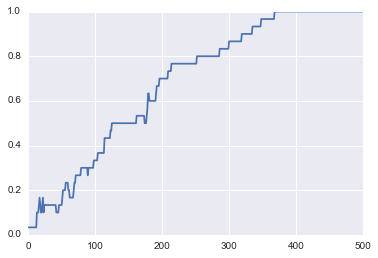

In [50]:
acc = []
with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    for i in range(500):
        session.run([cost, optimizer], feed_dict={x:inputs, y:targets})
        acc.append(session.run(accuracy, feed_dict={x:inputs, y:targets}))
    
plt.plot(range(len(acc)), acc)
plt.show()

In [55]:
targets

array([ 16,  16,  60,  93,  13, 109,  17,  10,  85,  10,   9,  85,  73,
         9,  36,  52,  74,   9,  19,  73,  85,  10,  57,  67,  85,  71,
         9,  96, 109,  67])